In [135]:
import numpy as np
import pandas as pd 
from sklearn.cluster import AgglomerativeClustering as AG
from scipy.cluster.hierarchy import dendrogram 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import os
import sys
import cluster
import plots 
import svd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# mutant 
# % open from SAXS
saxs = {
        'E':100, 
        'R':90,
        'Q':84,
        'N':77,
        'V':35,
        'G':32,
        'A':24,
        'S':24,
        }

In [5]:
# would be nice to have a mutant close to 50% activation
# maybe atchley factors can suggest
# find a residue in between N and V


# from eidos.bio import atchley_factors as af
# from eidos.utils import sort_dictionary_values as sort_dict

# midpoint = np.mean([af['N'],af['V']], axis=0)
# resi_similarities = {}
# for res_id, factors in af.items():
#     resi_similarities[res_id] = np.linalg.norm(factors - midpoint)
# sort_dict(resi_similarities) 

{'N': 2.0395200415784105,
 'V': 2.0395200415784105,
 'F': 2.213123810363984,
 'A': 2.2232975509364463,
 'C': 2.3063265163458535,
 'T': 2.391574167781547,
 'I': 2.4123527934363165,
 'L': 2.6274405797277316,
 'E': 2.6900881026464543,
 'W': 2.7232998365953023,
 'G': 2.8398751733130805,
 'K': 2.96275344907402,
 'P': 2.9922890903119637,
 'H': 3.00255541164522,
 'M': 3.333884821045862,
 'Y': 3.5513517144884426,
 'R': 3.7097063226083002,
 'Q': 4.104715580889862,
 'D': 5.284526563468104,
 'S': 5.8172209000518444}

In [6]:
# open the combined ccs data for all the states
df = pd.read_csv('test_data.csv', index_col='Resi')

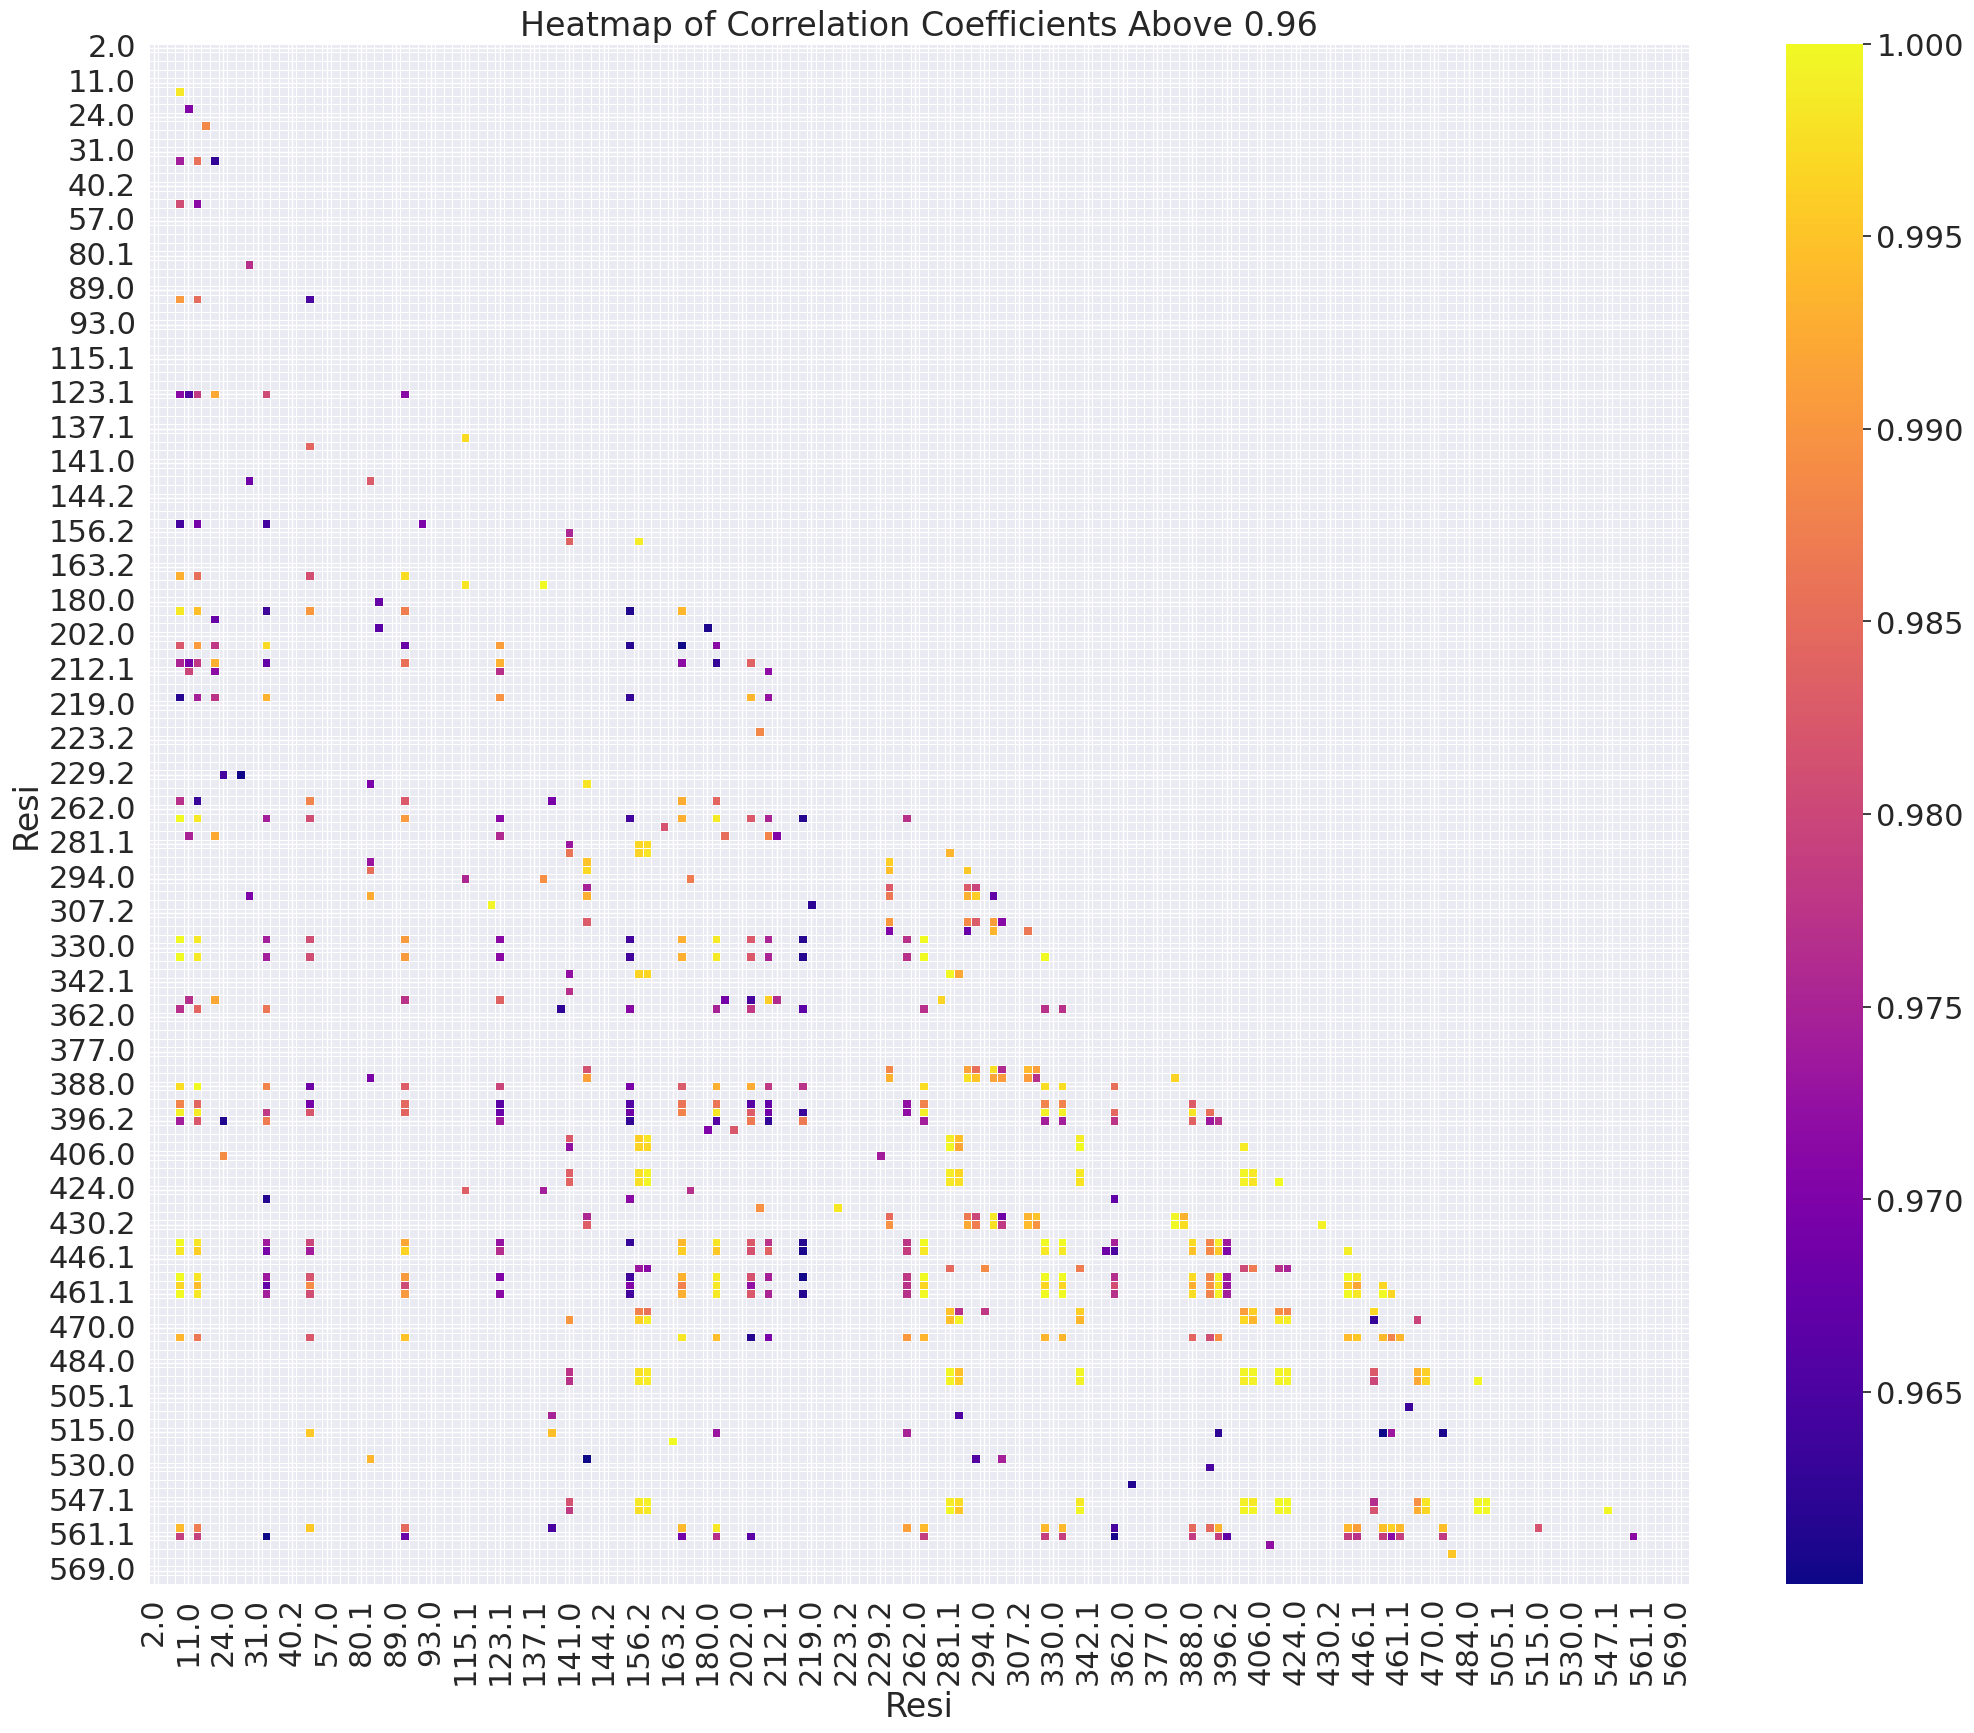

In [30]:
# decide on a cutoff
plots.heatmap_correlation_cutoffs(df, min_corr=.96)

In [61]:
# perform clustering on the correlation matrix
hac = cluster.HAC(df,cutoff=96)
# look at the absolute values of the correlation matrix
hac.absolute_corr

Resi,2.0,5.0,6.1,6.2,11.0,17.1,17.2,19.1,24.0,25.1,...,547.1,547.2,548.1,548.2,561.1,561.2,564.0,565.0,569.0,574.0
Resi,,,,,,,,,,,,,,,,,,,,,
2.0,1.000000,0.137274,0.368572,0.597637,0.736154,0.570612,0.077311,0.563160,0.530732,0.100531,...,0.741131,0.745840,0.179468,0.621193,0.459797,0.847799,0.480482,0.780938,0.563317,0.024305
5.0,0.137274,1.000000,0.640432,0.353062,0.305640,0.345321,0.773849,0.375414,0.308501,0.702498,...,0.345383,0.340090,0.471566,0.361277,0.451926,0.136114,0.368825,0.417259,0.494701,0.190477
6.1,0.368572,0.640432,1.000000,0.674499,0.620304,0.676767,0.256114,0.665614,0.840462,0.254942,...,0.459392,0.441274,0.403747,0.675250,0.666372,0.343246,0.401282,0.713987,0.023588,0.461854
6.2,0.597637,0.353062,0.674499,1.000000,0.919941,0.998364,0.294448,0.948393,0.917702,0.341702,...,0.731378,0.715315,0.576937,0.994038,0.979031,0.529261,0.580026,0.738922,0.001238,0.680953
11.0,0.736154,0.305640,0.620304,0.919941,1.000000,0.921647,0.091645,0.970500,0.878725,0.109065,...,0.630102,0.618805,0.356236,0.891078,0.860937,0.704197,0.802945,0.796962,0.147079,0.485499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561.2,0.847799,0.136114,0.343246,0.529261,0.704197,0.528644,0.318976,0.543312,0.587993,0.288282,...,0.377998,0.375542,0.375909,0.516512,0.353488,1.000000,0.406971,0.536342,0.800493,0.128665
564.0,0.480482,0.368825,0.401282,0.580026,0.802945,0.588827,0.005861,0.790631,0.559764,0.039342,...,0.300120,0.295742,0.325469,0.517872,0.572622,0.406971,1.000000,0.637796,0.143979,0.346507
565.0,0.780938,0.417259,0.713987,0.738922,0.796962,0.713946,0.009752,0.733411,0.755109,0.031597,...,0.823401,0.819044,0.311282,0.758177,0.679576,0.536342,0.637796,1.000000,0.107725,0.459570


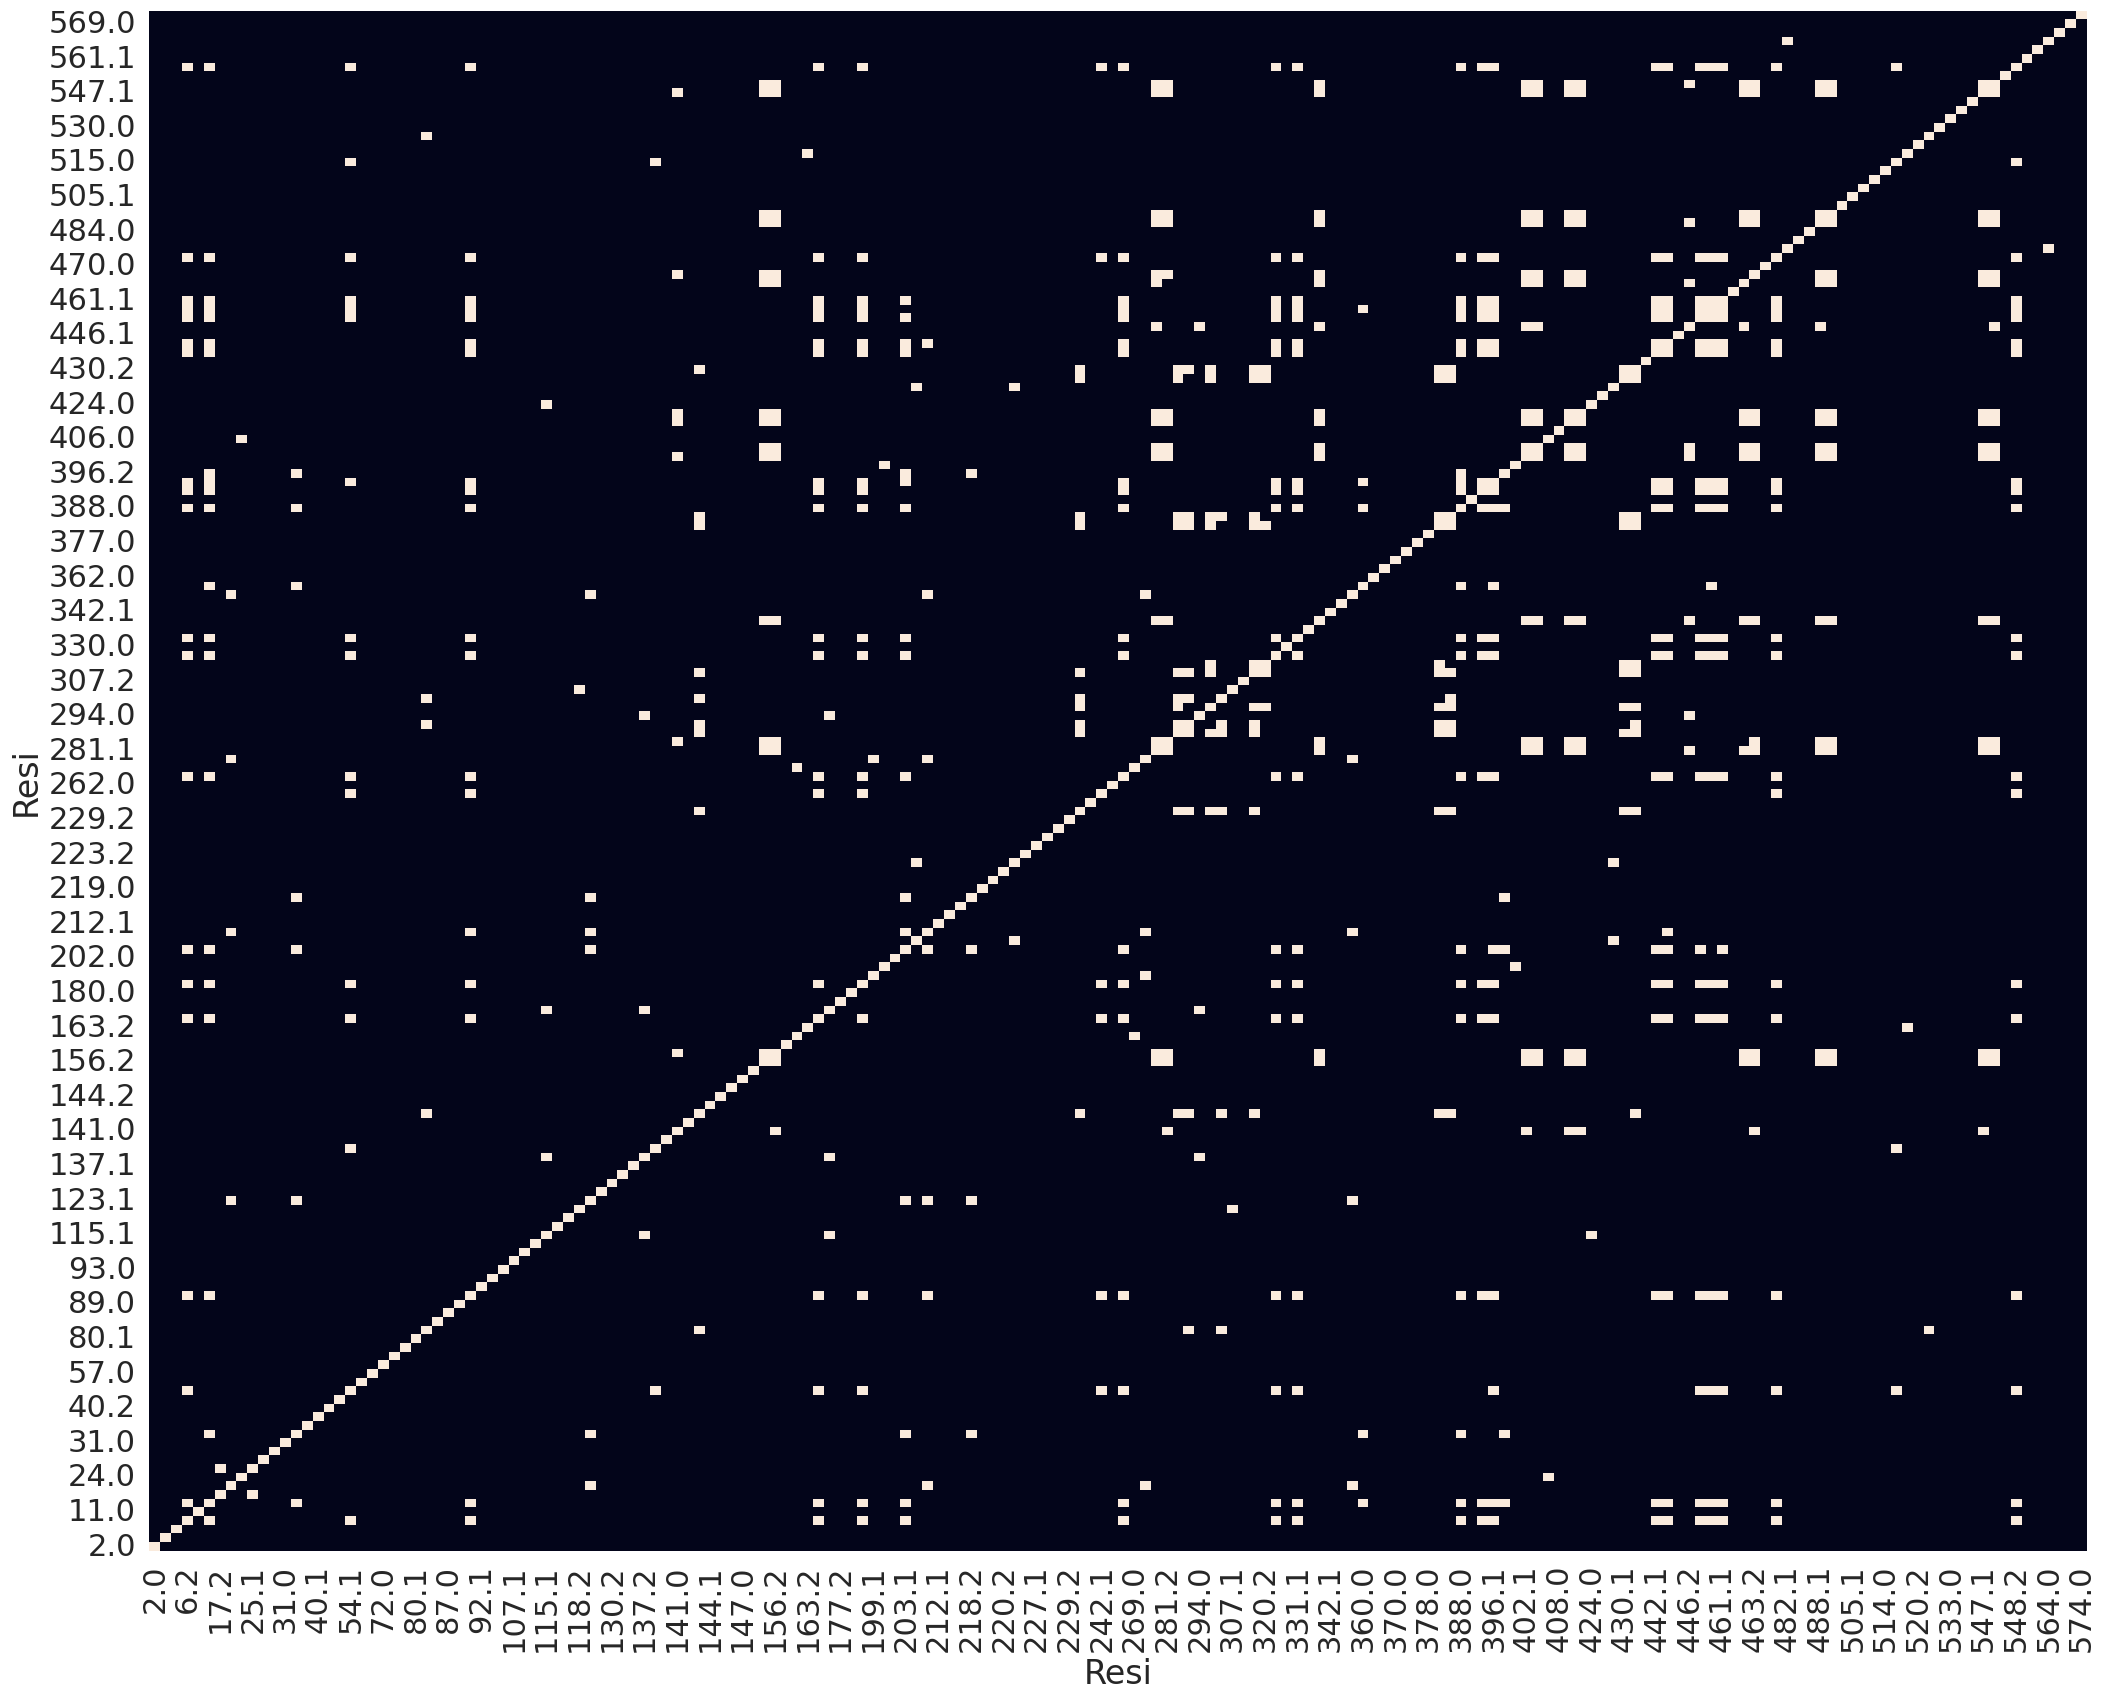

In [23]:
# plot the correlation matrix - the default cutoff is .98
plots.plot_corr(hac)

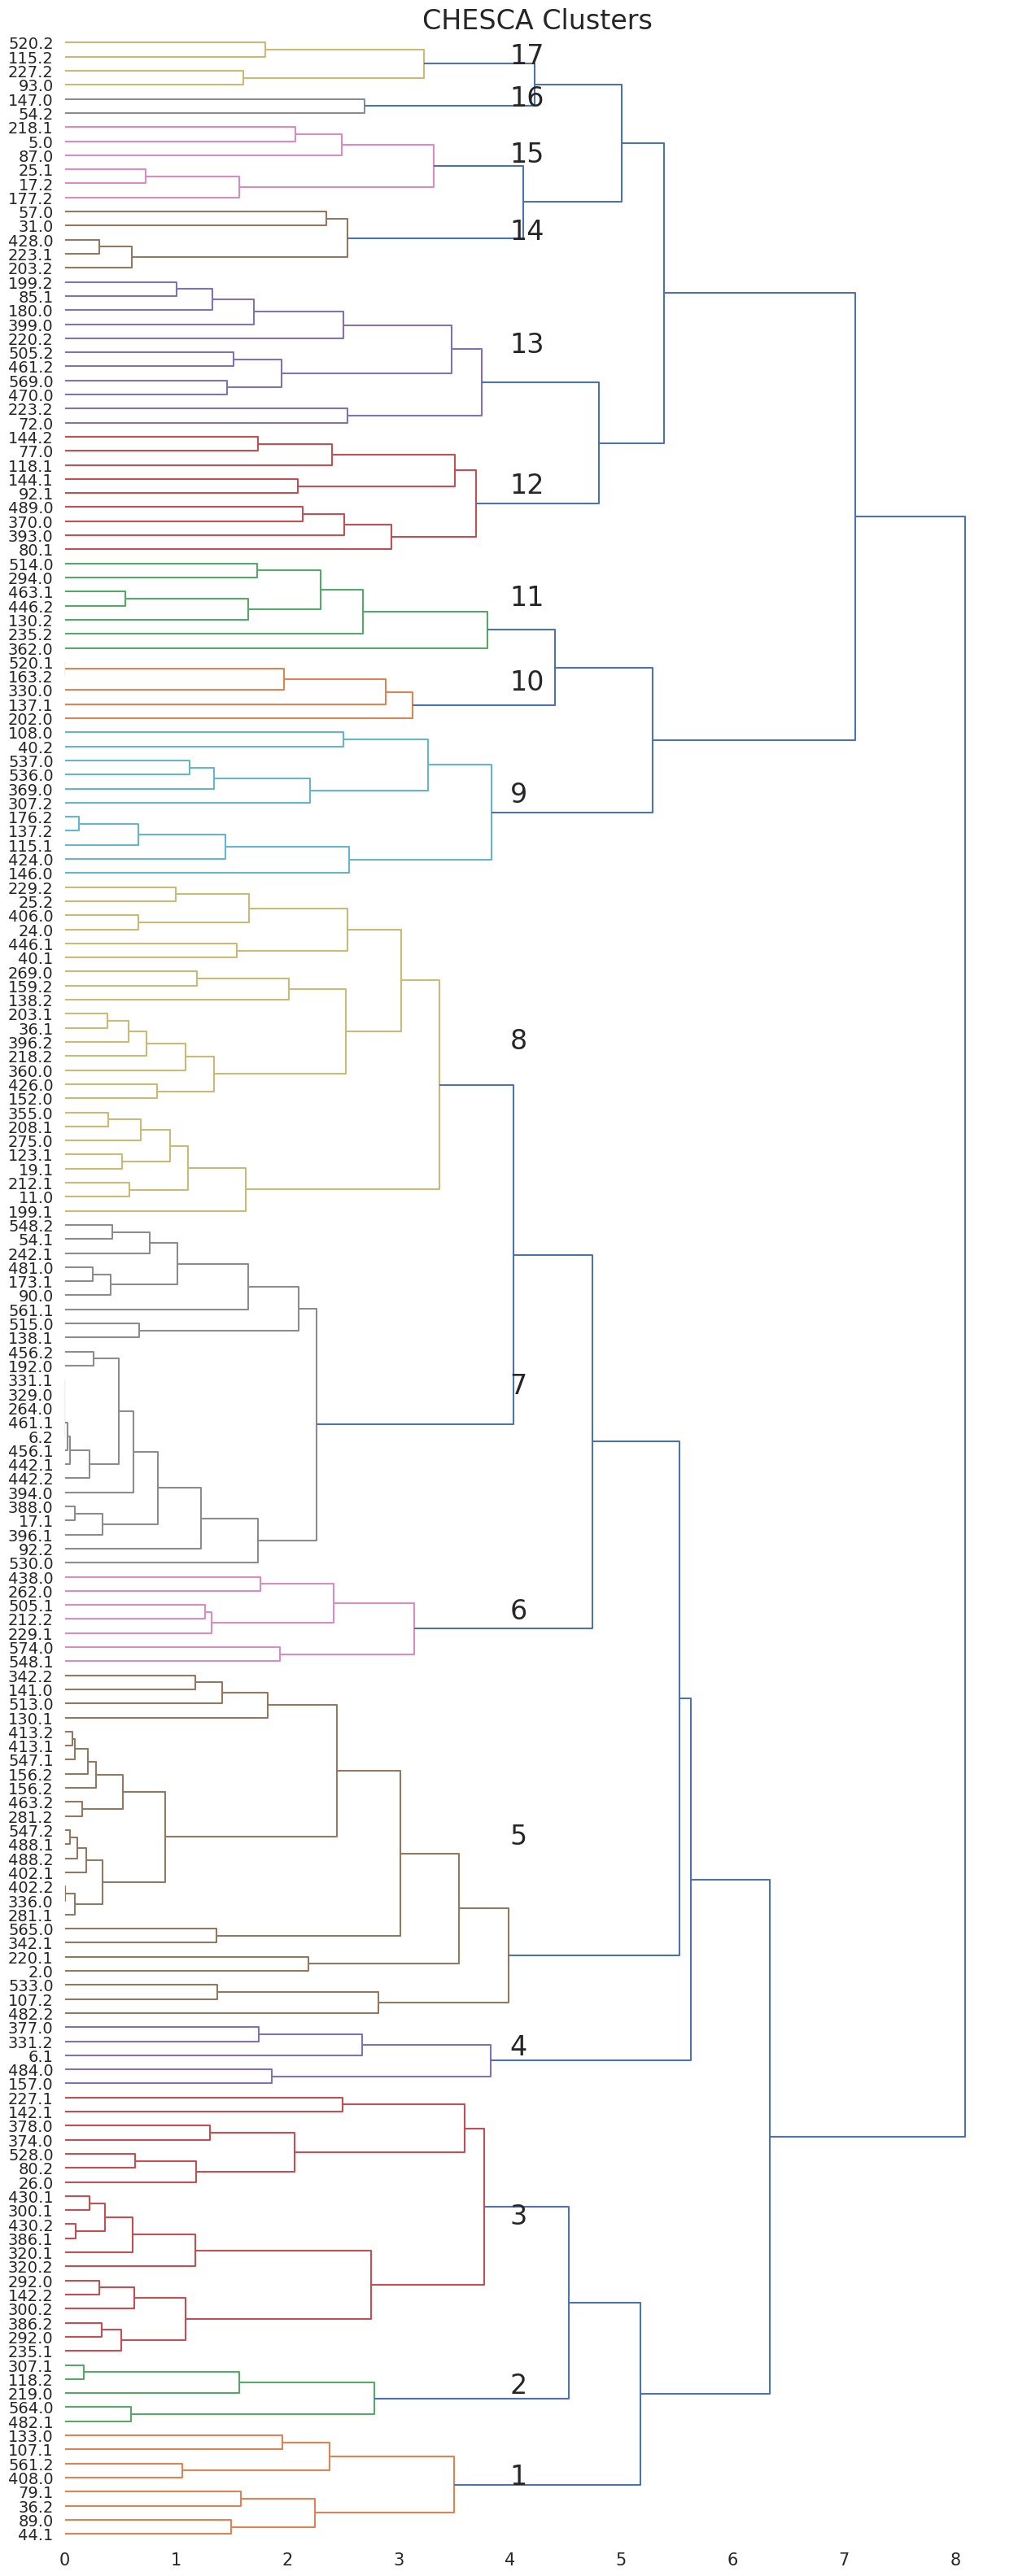

In [223]:
# look at the clustering with a given cutoff
plots.show_dendrogram(hac)

In [241]:
# SVD on the ccs data
dims = svd.SVD(df)

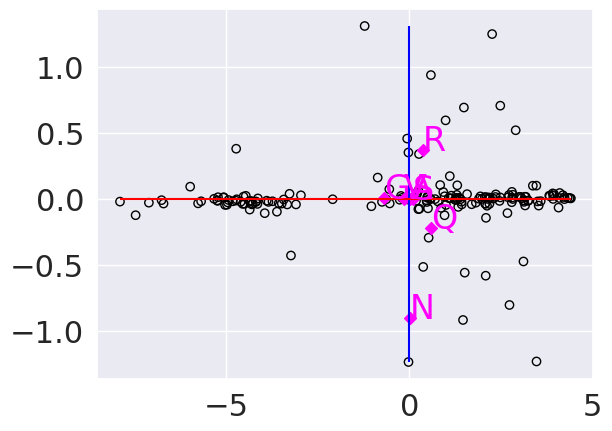

In [242]:
plots.plot_svd(dims)
# need to color the points that are in the subclusters

In [214]:
# ## prep raw cs
# cs = pd.read_csv('test_cs.csv')
# states = ['R','Q','N','A','G','S','V']
# w1 = [f'{state}w1' for state in states]
# w2 = [f'{state}w2' for state in states]
# allws = [a for tup in zip(w1,w2) for a in tup]

# ## mapper.values()to be the A (antagonist), S to be B (agonist), and Q to be ref/apo
# mapper = {'Rw1':'Aw1', 'Rw2':'Aw2', 'Sw1':'Bw1', 'Sw2':'Bw2', 'Qw1':'refw1',
#           'Qw2':'refw2'}
# adjusted = cs[list(mapper.keys())].rename(columns=mapper)
# dat = adjusted[list(mapper.values())]
# dat['RESI'] = df.index
# dat[['RESI', 'Aw1', 'Aw2', 'Bw1', 'Bw2', 'refw1', 'refw2']].to_csv('chespa_cs.csv')


In [217]:
chsp = Chespa('chespa_cs.csv',het_nuc='C')

The index column should be named "RESI".


/home/kanaka/python_packages/pychesca/chespa.py:88: RuntimeWarning: invalid value encountered in divide
  cos_theta = np.nan_to_num(cos_theta, nan=0)


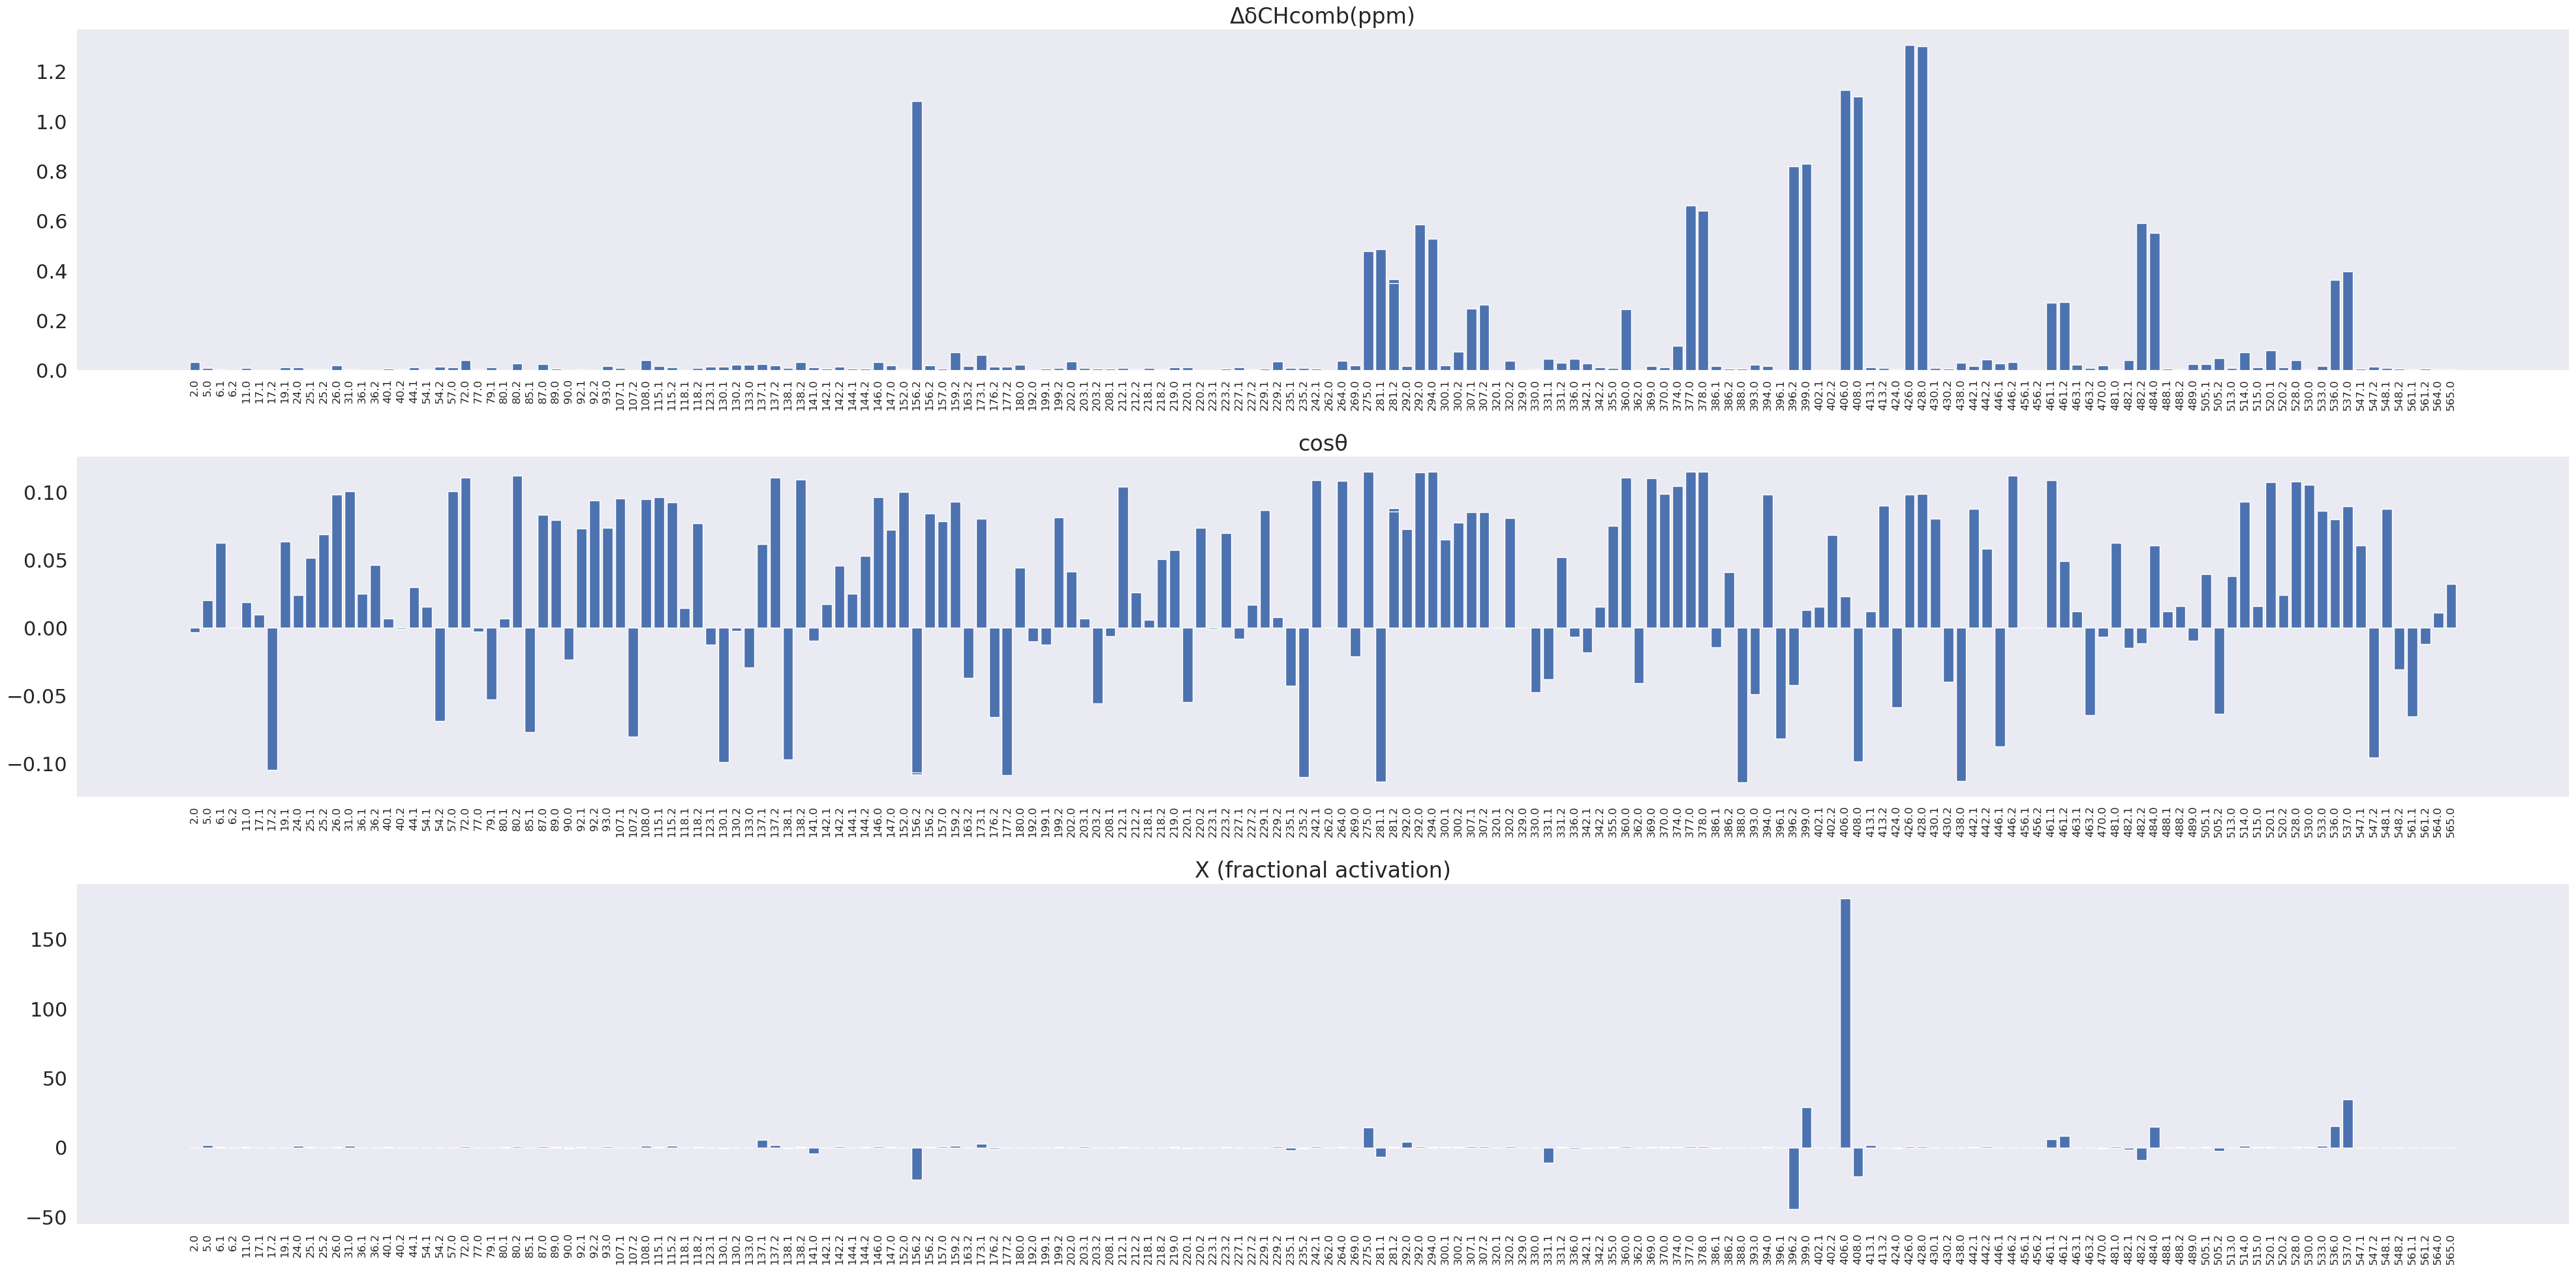

In [221]:
plots.plot_chespa(chsp)

In [239]:
real_clusters = set()
for c_id in hac.clusters['cluster'].unique():
    if len(hac.clusters[hac.clusters['cluster']==c_id])> 6:
        real_clusters.add(c_id)

In [240]:
real_clusters

{1, 3, 5, 6, 7, 8, 9, 11, 12, 13}

In [ ]:
# so now you subcluster each of these
# and then what do you do? - SVD on just those residues' data, project them on 
# the first two components along with the states and determine what the closest
# state is to each residue? I don't think so...
# it looks like a legitimate dendrogram is made with just the states
# I suppose instead of clustering on the matrix transpose correlation, you do it on
# the matrix that gives you just the states for rows and columns - but constructed only 
# with each cluster's residues....

In [250]:
sub_cluster_resis = hac.clusters[hac.clusters['cluster']==1].index
state_corr = df.loc[sub_cluster_resis].corr().abs()
hac_states = cluster.HAC(state_corr, cluster_states=True)

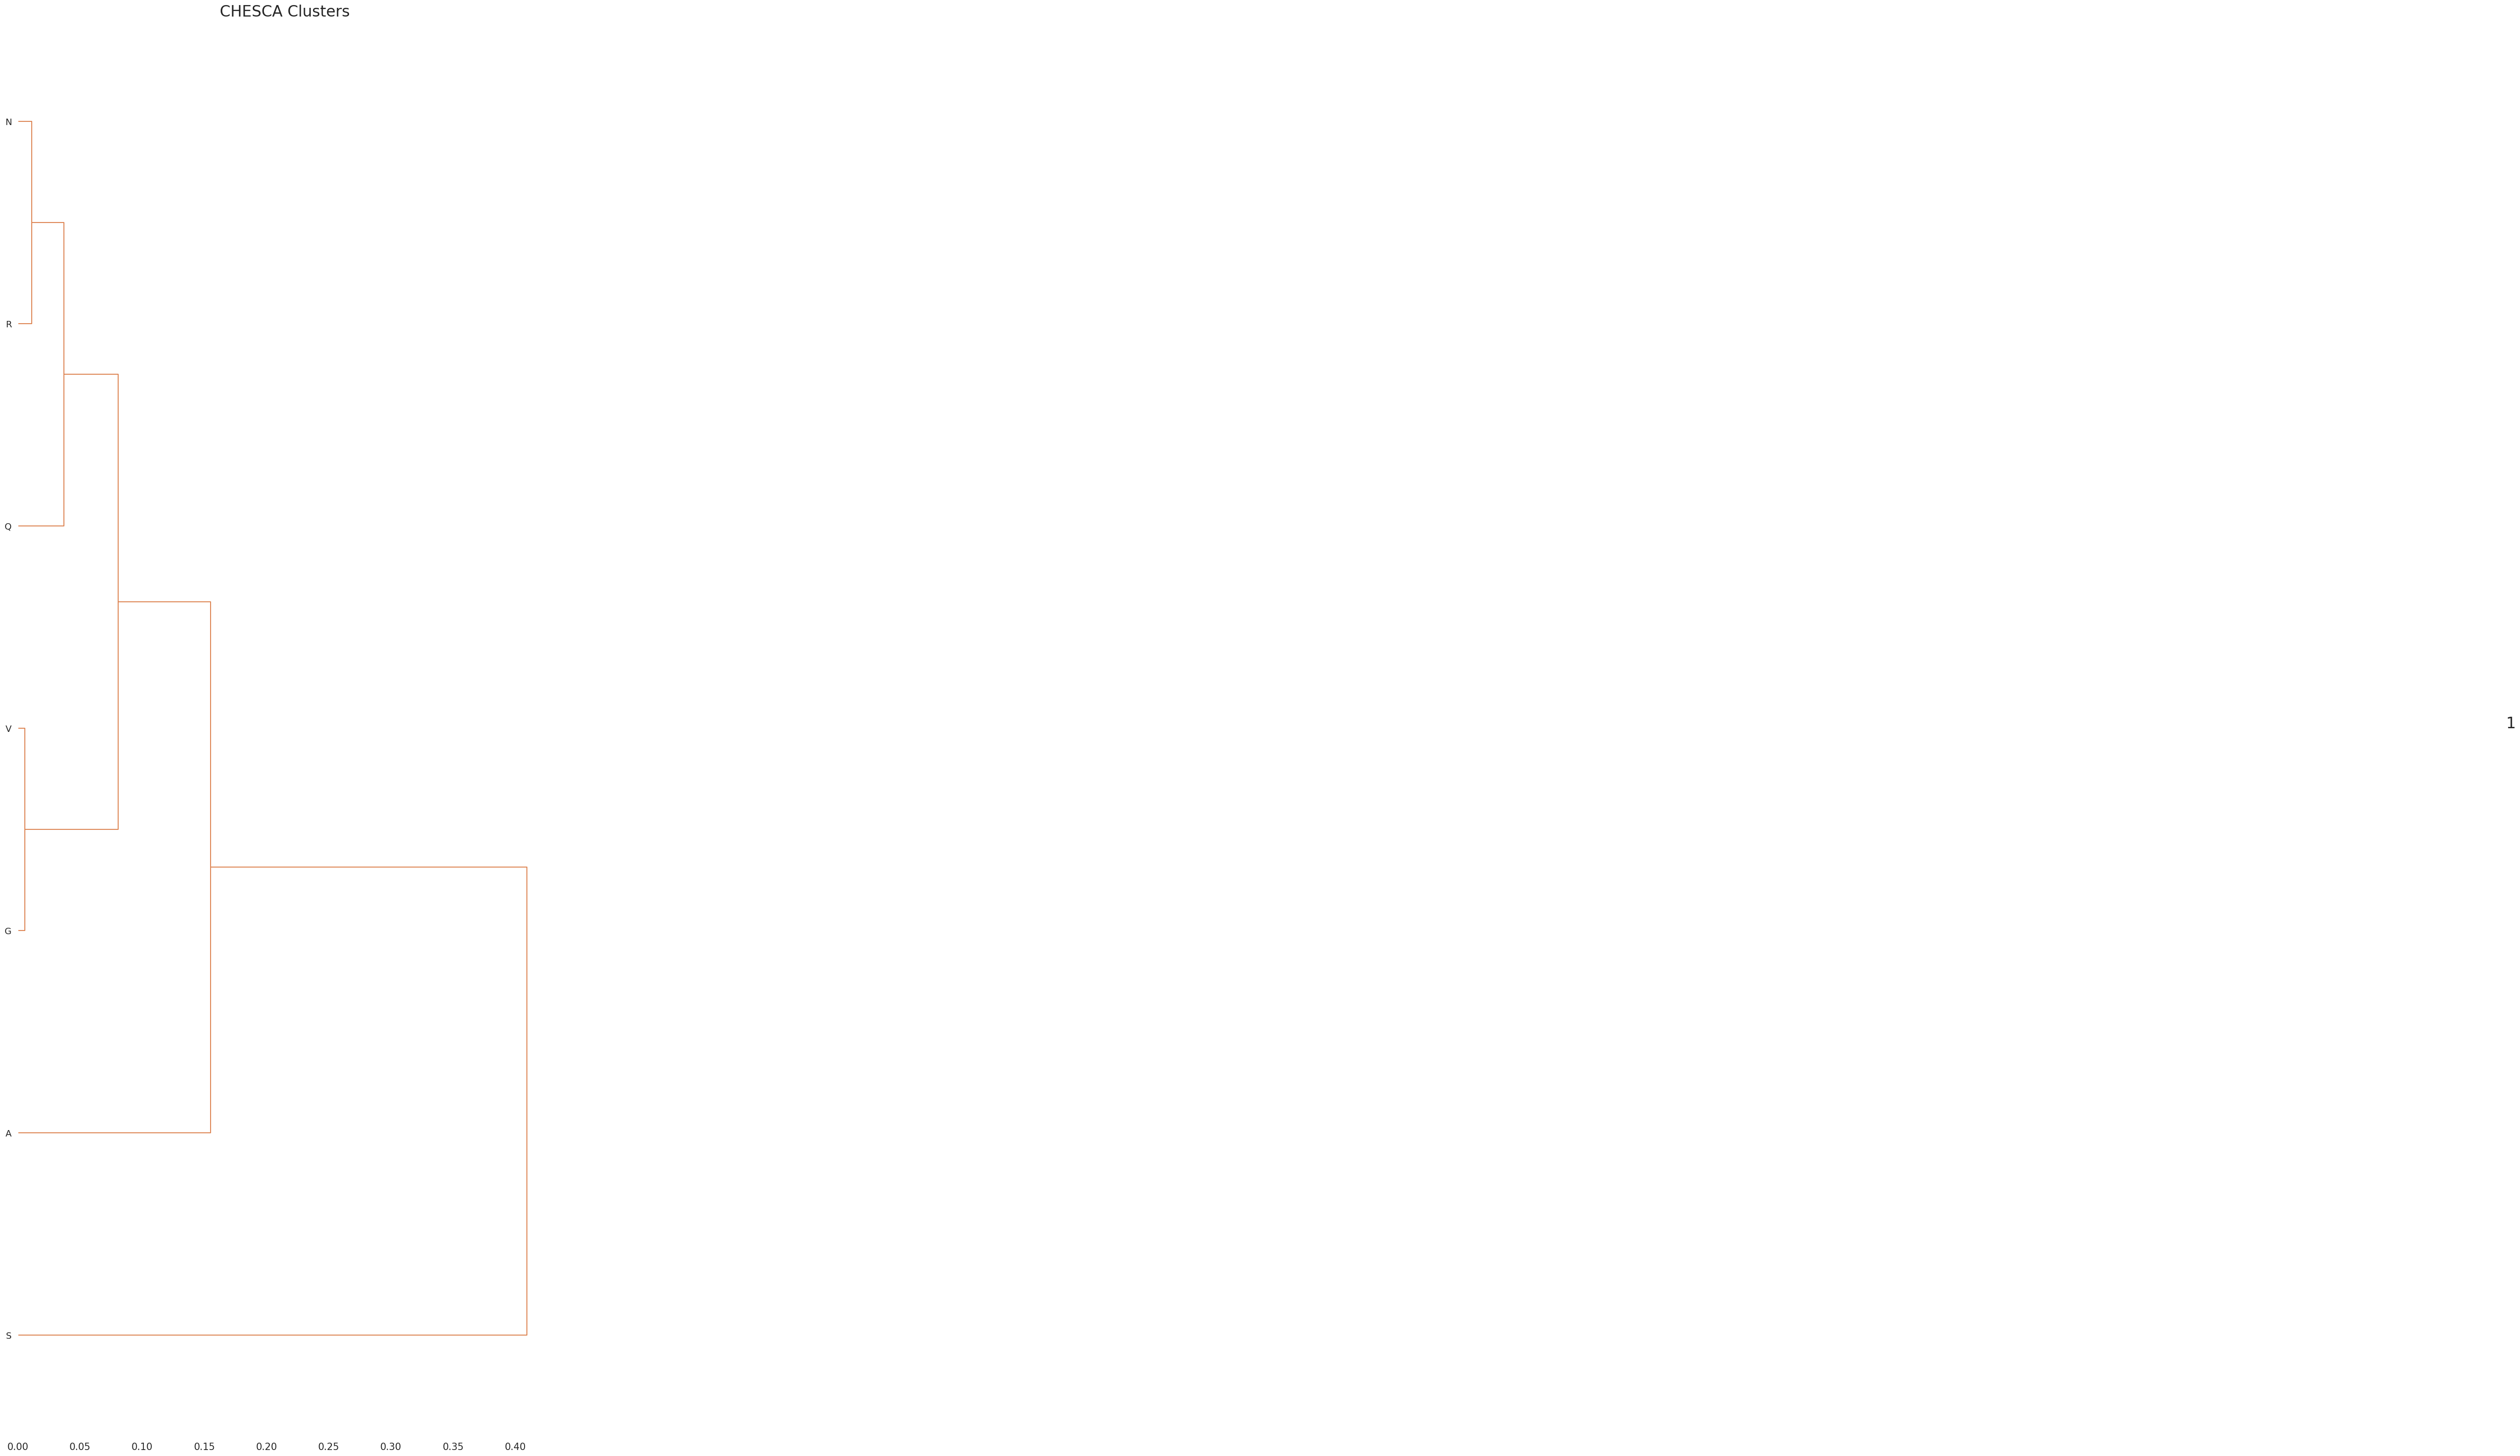

In [251]:
plots.show_dendrogram(hac_states)
# fix size 
# cluster one seems to separate them correctly.